In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

In [3]:
sample_freq = 1e6  # in Hz
length = 1.0  # in s
signal_strength = 0.0  # in dB
noise_strength = 0.0  # in dB

wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length)
sig = wm.get_soft(f_center=1.e5, dB=signal_strength)
sig += wm.get_soft(f_center=1.25e5, dB=signal_strength)
sig += wm.get_soft(f_center=1.5e5, dB=signal_strength)
sig += wm.get_soft(f_center=1.75e5, dB=signal_strength)
sig += wm.get_soft(f_center=2.e5, dB=signal_strength)
sig += wm.get_soft(f_center=-1.e5, dB=signal_strength)
sig += wm.get_soft(f_center=-2.e5, dB=signal_strength)

wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.get_signal(dB=noise_strength)

assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

both = sig + noise  # create actual signal ('both') comprising of signal and additive white gaussian noise (AWGN)

print('Signal power:    %6.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:     %6.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:             %6.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num Samples:     %9d ' % (num_samples))

# Note, that Parseval's theorem holds
from scipy import fft
print("Freqency Energy %6.2f" % (np.sum(np.abs(fft.fft(both))**2)/sample_freq))
print("Time Energy     %6.2f" % (np.sum(np.abs(both)**2)))

Signal power:      8.45 dB
Noise power:       0.00 dB
SNR:               8.45 dB
Num Samples:       1000000 
Freqency Energy 7997635.48
Time Energy     7997635.48


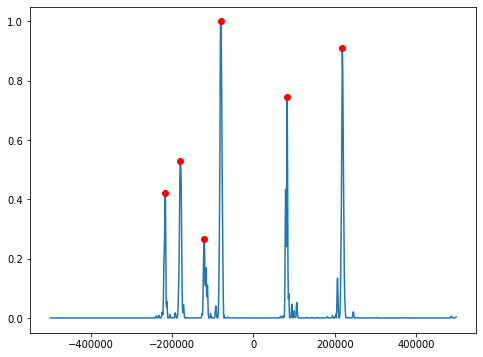

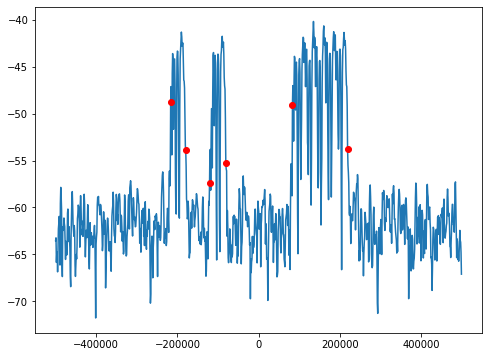

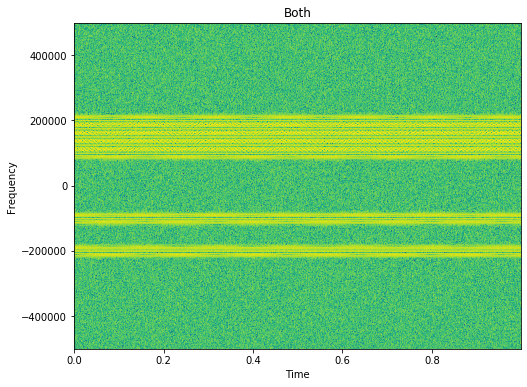

In [8]:
sft = ss.Stft(n=1024, window='flattop')
f, t, x = sft.spectogram(both, sample_freq, normalized=True, dB=True)

psd = ss.util_wide.psd_average(spectogram=x, start=10, stop=15)

prod, peak, peakf = ss.band_detect(psd,
                                   f,
                                   scale=5,
                                   min_height=0.2,
                                   min_freq=3e4)

plt.figure(figsize=(8, 6))
plt.plot(f, prod)
plt.plot(peakf, prod[peak], 'ro')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(f, psd)
plt.plot(peakf, psd[peak], 'ro')
plt.show()

plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title("Both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()